In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import pandas as pd

In [2]:
'''
텐서플로를 이용해 간단한 이미지 분류기를 만들어 볼 생각입니다. by Oreilang
'''

# 케라스에서 제공하는 데이터셋 다운로드 유틸리티 함수
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

In [3]:
X_train_full.shape

(60000, 28, 28)

In [4]:
X_train_full.dtype

dtype('uint8')

In [5]:
'''
픽셀이 0~255의 값을 가지는 정수이고, 그래서 uint8 (8bit의 unsigned 정수)이다. 
이걸 255로 나눠서 0~1의 값을 가지도록 변환하고, validation 데이터셋과 train 데이터셋을 분리하겠다.
'''

X_valid, X_train = X_train_full[:5000] / 255.0, X_train_full[5000:] / 255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255.0

In [6]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [7]:
# 두 개의 은닉층으로 이루어진 분류용 다층 퍼셉트론입니다.
model = keras.models.Sequential() ## 모델의 layer들의 container. Sequential 모델을 만든다. 
# 가장 간단한 케라스의 신경망 모델입니다. 순서대로 연결된 층을 일렬로 쌓아서 구성한다. 이걸 Sequential API라고 부릅니다.
model.add(keras.layers.Flatten(input_shape=[28, 28])) ## (28, 28) shape의 input을 flatten한다. (X.reshape(-1, 28*28)을 계산하는 것과 동일)
model.add(keras.layers.Dense(300, activation="relu")) ## 뉴런 300개 & relu activation을 가지는 Dense 층
model.add(keras.layers.Dense(100, activation="relu")) ## 뉴런 100개 & relu activation을 가지는 Dense 층
model.add(keras.layers.Dense(10, activation="softmax")) ## 뉴런 10개 & softmax activation을 가지는 Dense층.(출력층은 이런 식으로 작성되어야 함)

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [9]:
(784+1)*300 # 784 : dense_2의 input, 1 : bias. --> input node 수 : (784+1), 300 : 각 input 노드마다 가져야 하는 weight의 수.

235500

In [10]:
model.layers

In [11]:
hidden1 = model.layers[1]

In [12]:
hidden1.name

'dense'

In [13]:
weights, biases = hidden1.get_weights()

In [14]:
weights

array([[ 0.00333101, -0.00870356,  0.02183766, ..., -0.0711413 ,
        -0.06405613, -0.00489669],
       [ 0.0454184 ,  0.02310432, -0.02287433, ..., -0.01848421,
         0.00125761,  0.06927785],
       [ 0.03189403,  0.01523967,  0.02961459, ...,  0.00800841,
         0.02085385,  0.02280989],
       ...,
       [-0.02593695, -0.05821452, -0.06201033, ...,  0.03838222,
        -0.02246875,  0.06139304],
       [-0.0553412 , -0.04364005, -0.01543853, ..., -0.01912199,
        -0.05166727, -0.01848609],
       [ 0.01699739, -0.02952962, -0.03903154, ...,  0.01390575,
        -0.01952998,  0.00988534]], dtype=float32)

In [15]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [17]:
# 모델 컴파일
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

# 모델 훈련
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.7309 - accuracy: 0.7603 - val_loss: 0.5074 - val_accuracy: 0.8306
Epoch 2/30
1719/1719 [==============================] - 4s 3ms/step - loss: 0.4883 - accuracy: 0.8317 - val_loss: 0.4408 - val_accuracy: 0.8500
Epoch 3/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.4428 - accuracy: 0.8456 - val_loss: 0.4108 - val_accuracy: 0.8580
Epoch 4/30
1719/1719 [==============================] - 4s 3ms/step - loss: 0.4154 - accuracy: 0.8560 - val_loss: 0.3970 - val_accuracy: 0.8652
Epoch 5/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.3947 - accuracy: 0.8625 - val_loss: 0.3815 - val_accuracy: 0.8672
Epoch 6/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.3789 - accuracy: 0.8679 - val_loss: 0.3681 - val_accuracy: 0.8732
Epoch 7/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.3657 - accuracy: 0.8724 - val_loss: 0.3792 - val_accuracy:

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

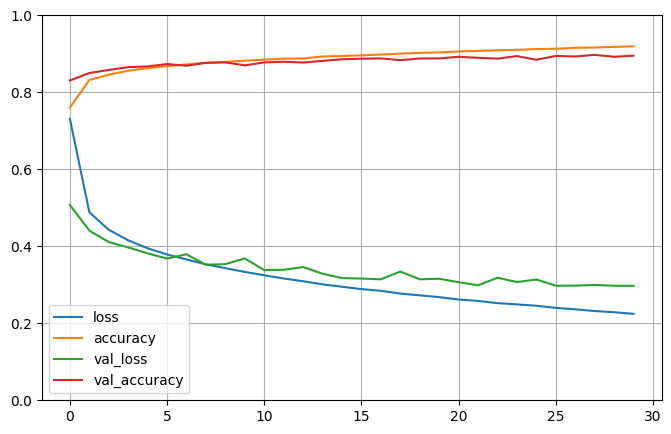

In [22]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [23]:
model.evaluate(X_test, y_test) # loss와 metric을 둘 다 넣었으므로, 두 개의 결과값이 나온다.

313/313 [==============================] - 0s 1ms/step - loss: 0.3294 - accuracy: 0.8818


[0.32937079668045044, 0.8817999958992004]

In [24]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

1/1 [==============================] - 0s 75ms/step


array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.02, 0.  , 0.98],
       [0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

In [25]:
y_pred = model.predict_classes(X_new)
y_pred

AttributeError: 'Sequential' object has no attribute 'predict_classes'

## 캘리포니아 주택가격 데이터셋 활용하여 회귀 신경망 활용

In [8]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

housing = fetch_california_housing()

X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)


In [9]:
X_train.shape

(11610, 8)

In [30]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=X_train.shape[1:]), # X_train의 data개수가 0, 그 이후가 레코드 하나의 크기.
    keras.layers.Dense(1)
])
model.compile(loss="mean_squared_error", optimizer=keras.optimizers.SGD(lr=0.01))
'''
분류 모델일 때는 아래와 같이 compile 했었다.
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])
회귀 모델일 때의 compile 메소드에는 metrics를 넣지 않는데 이유가 ?
'''

history = model.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid))
mse_test = model.evaluate(X_test, y_test) # compile 시에 loss만 집어넣었으므로, mse_test도 loss만 나오게 함.
X_new = X_test[:3]
y_pred = model.predict(X_new)

Epoch 1/20
363/363 [==============================] - 1s 2ms/step - loss: 0.9171 - val_loss: 0.6190
Epoch 2/20
363/363 [==============================] - 1s 2ms/step - loss: 0.7376 - val_loss: 0.7256
Epoch 3/20
363/363 [==============================] - 1s 2ms/step - loss: 0.9363 - val_loss: 0.4865
Epoch 4/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5014 - val_loss: 0.4745
Epoch 5/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4637 - val_loss: 0.4462
Epoch 6/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4374 - val_loss: 0.4298
Epoch 7/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4443 - val_loss: 0.4395
Epoch 8/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4268 - val_loss: 0.4261
Epoch 9/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4131 - val_loss: 0.4013
Epoch 10/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4022 - val_loss: 0.3923

In [35]:
# Wide & Deep Neural Network를 활용한 캘리포니아 주택 문제 해결
input_ = keras.layers.Input(shape=X_train.shape[1:])
hidden1 = keras.layers.Dense(30, activation="relu")(input_)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.Concatenate()([input_, hidden2])
output = keras.layers.Dense(1)(concat)
model = keras.Model(inputs=[input_], outputs=[output])

In [45]:
# 딥러닝 구조를 코드로 짜기 전에 먼저 그림으로 구조를 그려놓고, 그에 따라서 해나가는 게 좋을 듯
# 애초에 딥러닝 구조를 스스로 짜 놓을 필요성이 앞으로 있을지는 모르겠지만(pretrained model?)
input_A = keras.layers.Input(shape=[5], name="wide_input")
input_B = keras.layers.Input(shape=[6], name="deep_input")
hidden1 = keras.layers.Dense(30, activation="relu")(input_B)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.Concatenate()([input_A, hidden2])
output = keras.layers.Dense(1, name="output")(concat)
model = keras.Model(inputs=[input_A, input_B], outputs=[output])

In [46]:
model.compile(loss="mse", optimizer=keras.optimizers.SGD(lr=1e-3))

X_train_A, X_train_B = X_train[:, :5], X_train[:, 2:]
X_valid_A, X_valid_B = X_valid[:, :5], X_valid[:, 2:]
X_test_A, X_test_B = X_test[:, :5], X_test[:, 2:]
X_new_A, X_new_B = X_test_A[:3], X_test_B[:3]

history = model.fit((X_train_A, X_train_B), y_train, epochs=20, validation_data=((X_valid_A, X_valid_B), y_valid))
mse_test = model.evaluate((X_test_A, X_test_B), y_test)
y_pred = model.predict((X_new_A, X_new_B))

Epoch 1/20
363/363 [==============================] - 1s 2ms/step - loss: 0.7949 - val_loss: 0.5446
Epoch 2/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4936 - val_loss: 0.5392
Epoch 3/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4510 - val_loss: 0.4727
Epoch 4/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4274 - val_loss: 0.4353
Epoch 5/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4456 - val_loss: 0.4401
Epoch 6/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4212 - val_loss: 0.4544
Epoch 7/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4016 - val_loss: 0.4122
Epoch 8/20
363/363 [==============================] - 1s 2ms/step - loss: 0.3934 - val_loss: 0.4267
Epoch 9/20
363/363 [==============================] - 1s 2ms/step - loss: 0.3924 - val_loss: 0.3939
Epoch 10/20
363/363 [==============================] - 1s 1ms/step - loss: 0.3811 - val_loss: 0.3859

#### 서브클래싱 API로 동적 모델 만들기.

시퀀셜 API, 함수형 API는 모두 선언적이다. 그러나 어떤 모델의 경우 반복문을 돌거나 하는 등, 커스텀해야 할 것들이 많다. customize를 더 깊은 곳까지 하고 싶다면 서브클래싱 API를 사용해서 직접 층을 구성할 수 있다.

In [38]:
class WideAndDeepModel(keras.Model):
    def __init__(self, units=30, activation="relu", **kwargs):
        super().__init__(**kwargs)  # 표준 매개변수에 대한 처리
        self.hidden1 = keras.layers.Dense(units, activation=activation, name="hidden1")
        self.hidden2 = keras.layers.Dense(units, activation=activation, name="hidden2")
        self.main_output = keras.layers.Dense(1, name="main_output")
        self.aux_output = keras.layers.Dense(1, name="aux_output")

    def call(self, inputs):
        input_A, input_B = inputs
        hidden1 = self.hidden1(input_B)
        hidden2 = self.hidden2(hidden1)
        concat = keras.layers.concatenate([input_A, hidden2])
        main_output = self.main_output(concat)
        aux_output = self.aux_output(hidden2)     # main_output을 위한 층과 aux_output을 위한 층은 다른 층이므로 다른 변수에 만들어줘야 한다.
        return main_output, aux_output

model1 = WideAndDeepModel()

In [39]:
model1.compile(loss=["mse", "mse"], loss_weights=[0.9, 0.1], optimizer=keras.optimizers.SGD(lr=0.01))
history = model1.fit([X_train_A, X_train_B], [y_train, y_train], epochs=20,
                      validation_data=([X_valid_A, X_valid_B], [y_valid, y_valid]))

Epoch 1/20
363/363 [==============================] - 1s 2ms/step - loss: 1.0151 - output_1_loss: 0.8871 - output_2_loss: 2.1671 - val_loss: 0.6367 - val_output_1_loss: 0.5835 - val_output_2_loss: 1.1160
Epoch 2/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5625 - output_1_loss: 0.5154 - output_2_loss: 0.9865 - val_loss: 0.7268 - val_output_1_loss: 0.7056 - val_output_2_loss: 0.9171
Epoch 3/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5325 - output_1_loss: 0.5001 - output_2_loss: 0.8240 - val_loss: 0.5051 - val_output_1_loss: 0.4758 - val_output_2_loss: 0.7686
Epoch 4/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4862 - output_1_loss: 0.4592 - output_2_loss: 0.7284 - val_loss: 0.4985 - val_output_1_loss: 0.4764 - val_output_2_loss: 0.6975
Epoch 5/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4551 - output_1_loss: 0.4321 - output_2_loss: 0.6619 - val_loss: 0.5007 - val_output_1_loss: 0.4758 - val_ou

In [41]:
total_loss, main_loss, aux_loss = model1.evaluate(
    [X_test_A, X_test_B], [y_test, y_test]
)

162/162 [==============================] - 0s 1ms/step - loss: 0.3784 - output_1_loss: 0.3670 - output_2_loss: 0.4806


#### 모델 저장, 복원

시퀀셜 API, 함수형 API의 저장은 쉽다고하네요.

In [47]:
model.save("my_keras_model.h5")

In [48]:
model1.save("my_keras_model1.h5")

NotImplementedError: Saving the model to HDF5 format requires the model to be a Functional model or a Sequential model. It does not work for subclassed models, because such models are defined via the body of a Python method, which isn't safely serializable. Consider saving to the Tensorflow SavedModel format (by setting save_format="tf") or using `save_weights`.

#### 콜백 사용하기.

`fit()`메서드에서 callbacks 매개변수가 들어갈 수 있고. 이 매개변수는 케라스가 훈련의 시작이나 끝에 호출할 객체 리스트를 지정할 수 있도록 해 준다. (또는 에포크의 시작, 끝, 각 배치 처리 전후에 호출할 수 도 있다. ModelCheckpoint라는 객체는 훈련 동안 일정한 간격으로 체크포인트를 저장함)

In [51]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

housing = fetch_california_housing()

X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
x_test = scaler.transform(X_test)

In [52]:
X_train.shape

(11610, 8)

In [62]:
input_ = keras.layers.Input(shape=(8,))
hidden1 = keras.layers.Dense(30, activation="relu")(input_)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.concatenate([input_, hidden2])
output = keras.layers.Dense(1)(concat)

model = keras.Model(inputs=[input_], outputs=[output])
model.compile(loss="mse", optimizer=keras.optimizers.SGD(learning_rate=0.001))

In [63]:
checkpoint_cb = keras.callbacks.ModelCheckpoint("my_keras_model.h5")
history = model.fit(X_train, y_train, epochs=20, callbacks=[checkpoint_cb])

Epoch 1/20
363/363 [==============================] - 1s 1ms/step - loss: 2.0424
Epoch 2/20
363/363 [==============================] - 0s 1ms/step - loss: 0.7190
Epoch 3/20
363/363 [==============================] - 0s 1ms/step - loss: 0.6696
Epoch 4/20
363/363 [==============================] - 0s 1ms/step - loss: 0.6371
Epoch 5/20
363/363 [==============================] - 0s 1ms/step - loss: 0.6118
Epoch 6/20
363/363 [==============================] - 0s 1ms/step - loss: 0.5915
Epoch 7/20
363/363 [==============================] - 1s 1ms/step - loss: 0.5751
Epoch 8/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5607
Epoch 9/20
363/363 [==============================] - 0s 1ms/step - loss: 0.5489
Epoch 10/20
363/363 [==============================] - 0s 1ms/step - loss: 0.5392
Epoch 11/20
363/363 [==============================] - 1s 1ms/step - loss: 0.5304
Epoch 12/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5244
Epoch 13/20
363/363 [====

In [64]:
input_ = keras.layers.Input(shape=(8,))
hidden1 = keras.layers.Dense(30, activation="relu")(input_)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.concatenate([input_, hidden2])
output = keras.layers.Dense(1)(concat)

model2 = keras.Model(inputs=[input_], outputs=[output])
model2.compile(loss="mse", optimizer=keras.optimizers.SGD(learning_rate=0.001))

In [65]:
checkpoint_cb2 = keras.callbacks.ModelCheckpoint("my_keras_best_model.h5", save_best_only=True)
history2 = model2.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid), callbacks=[checkpoint_cb2])

Epoch 1/20
363/363 [==============================] - 1s 2ms/step - loss: 2.3985 - val_loss: 0.9515
Epoch 2/20
363/363 [==============================] - 1s 1ms/step - loss: 0.7892 - val_loss: 0.7021
Epoch 3/20
363/363 [==============================] - 1s 1ms/step - loss: 0.7053 - val_loss: 0.6409
Epoch 4/20
363/363 [==============================] - 1s 1ms/step - loss: 0.6581 - val_loss: 0.5995
Epoch 5/20
363/363 [==============================] - 1s 2ms/step - loss: 0.6230 - val_loss: 0.5692
Epoch 6/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5967 - val_loss: 0.5555
Epoch 7/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5762 - val_loss: 0.5304
Epoch 8/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5605 - val_loss: 0.5174
Epoch 9/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5475 - val_loss: 0.5117
Epoch 10/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5370 - val_loss: 0.5055

In [66]:
best_model = keras.models.load_model("my_keras_best_model.h5")

In [67]:
best_model.summary()

Model: "model_7"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_7 (InputLayer)           [(None, 8)]          0           []                               
                                                                                                  
 dense_32 (Dense)               (None, 30)           270         ['input_7[0][0]']                
                                                                                                  
 dense_33 (Dense)               (None, 30)           930         ['dense_32[0][0]']               
                                                                                                  
 concatenate_7 (Concatenate)    (None, 38)           0           ['input_7[0][0]',                
                                                                  'dense_33[0][0]']         

In [74]:
best_model.layers[4]

In [73]:
best_model.get_layer('dense_34')

In [77]:
weights, biases = best_model.get_layer('dense_34').get_weights()

In [79]:
weights.shape

(38, 1)

#### EarlyStopping callback

`keras.callbacks.EarlyStopping()`을 활용하기

In [80]:
early_stopping_cb = keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)  # 10개 epoch 까지만 참는다.

history = model.fit(
    X_train, y_train, epochs=100,
    validation_data=(X_valid, y_valid),
    callbacks=[checkpoint_cb, early_stopping_cb]
)

Epoch 1/100
363/363 [==============================] - 0s 1ms/step - loss: 0.4846 - val_loss: 0.4641
Epoch 2/100
363/363 [==============================] - 0s 1ms/step - loss: 0.4820 - val_loss: 0.4642
Epoch 3/100
363/363 [==============================] - 0s 1ms/step - loss: 0.4799 - val_loss: 0.4586
Epoch 4/100
363/363 [==============================] - 0s 1ms/step - loss: 0.4763 - val_loss: 0.4562
Epoch 5/100
363/363 [==============================] - 0s 987us/step - loss: 0.4740 - val_loss: 0.4571
Epoch 6/100
363/363 [==============================] - 0s 1ms/step - loss: 0.4721 - val_loss: 0.4523
Epoch 7/100
363/363 [==============================] - 0s 1ms/step - loss: 0.4702 - val_loss: 0.4496
Epoch 8/100
363/363 [==============================] - 0s 994us/step - loss: 0.4672 - val_loss: 0.4480
Epoch 9/100
363/363 [==============================] - 0s 991us/step - loss: 0.4651 - val_loss: 0.4468
Epoch 10/100
363/363 [==============================] - 0s 989us/step - loss: 0.4635 

#### 사용자 정의 콜백을 만들 수도 있다.

In [81]:
class PrintValTrainRatioCallback(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs):
        print("\nval/train: {:.2f}".format(logs['val_loss']/logs['loss']))

In [82]:
my_cb = PrintValTrainRatioCallback()
history = model.fit(
    X_train, y_train, epochs=100,
    validation_data=(X_valid, y_valid),
    callbacks=[checkpoint_cb, early_stopping_cb, my_cb]
)

# 왜 에포크마다 두 줄씩 나와?

Epoch 1/100
353/363 [============================>.] - ETA: 0s - loss: 0.3756
val/train: 0.98
363/363 [==============================] - 0s 1ms/step - loss: 0.3763 - val_loss: 0.3669
Epoch 2/100
338/363 [==========================>...] - ETA: 0s - loss: 0.3808
val/train: 0.97
363/363 [==============================] - 0s 1ms/step - loss: 0.3760 - val_loss: 0.3653
Epoch 3/100
337/363 [==========================>...] - ETA: 0s - loss: 0.3824
val/train: 0.97
363/363 [==============================] - 0s 1ms/step - loss: 0.3758 - val_loss: 0.3659
Epoch 4/100
315/363 [=========================>....] - ETA: 0s - loss: 0.3751
val/train: 0.98
363/363 [==============================] - 0s 1ms/step - loss: 0.3752 - val_loss: 0.3659
Epoch 5/100
345/363 [===========================>..] - ETA: 0s - loss: 0.3741
val/train: 0.98
363/363 [==============================] - 0s 1ms/step - loss: 0.3731 - val_loss: 0.3650
Epoch 6/100
332/363 [==========================>...] - ETA: 0s - loss: 0.3740
val/tra

#### tensorboard 사용하기

In [83]:
import os
root_logdir = os.path.join(os.curdir, "my_logs")

def get_run_logdir():
    import time
    run_id = time.strftime("run_%Y_%m_%d-%H_%M_%S")
    return os.path.join(root_logdir, run_id)

run_logdir = get_run_logdir()

In [84]:
tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)
history = model.fit(
    X_train, y_train, epochs=30,
    validation_data=(X_valid, y_valid),
    callbacks=[tensorboard_cb]
)

Epoch 1/30
363/363 [==============================] - 0s 1ms/step - loss: 0.3221 - val_loss: 0.3281
Epoch 2/30
363/363 [==============================] - 0s 1ms/step - loss: 0.3230 - val_loss: 0.3261
Epoch 3/30
363/363 [==============================] - 0s 1ms/step - loss: 0.3220 - val_loss: 0.3242
Epoch 4/30
363/363 [==============================] - 0s 1ms/step - loss: 0.3219 - val_loss: 0.3235
Epoch 5/30
363/363 [==============================] - 0s 1ms/step - loss: 0.3212 - val_loss: 0.3224
Epoch 6/30
363/363 [==============================] - 0s 1ms/step - loss: 0.3206 - val_loss: 0.3270
Epoch 7/30
363/363 [==============================] - 0s 1ms/step - loss: 0.3215 - val_loss: 0.3225
Epoch 8/30
363/363 [==============================] - 0s 1ms/step - loss: 0.3208 - val_loss: 0.3248
Epoch 9/30
363/363 [==============================] - 0s 1ms/step - loss: 0.3199 - val_loss: 0.3239
Epoch 10/30
363/363 [==============================] - 0s 1ms/step - loss: 0.3186 - val_loss: 0.3217